[![View notebook in Deepnote](https://deepnote.com/static/buttons/view-in-deepnote.svg)](https://deepnote.com/viewer/github/xKDR/datascience-tutorials/blob/main/rasters.ipynb) 

[![View on YouTube](https://img.shields.io/badge/Video-YouTube-critical)](https://deepnote.com/viewer/github/xKDR/datascience-tutorials/blob/main/rasters.ipynb)


# Rasters

In [1]:
using Rasters, Plots, Statistics, Shapefile, DataFrames, Dates, Suppressor

In [2]:
raster = Raster("DATA/Harmonized_DN_NTL_2020_simVIIRS.tif")

43201×16801×1 Raster{UInt8,3} with dimensions: 
  X Projected{Float64} range(-180.004, stop=179.996, length=43201) ForwardOrdered Regular Intervals crs: WellKnownText,
  Y Projected{Float64} range(74.9958, stop=-65.0042, length=16801) ReverseOrdered Regular Intervals crs: WellKnownText,
  Band Categorical{Int64} 1:1 ForwardOrdered
[:, :, 1]
             74.9958    74.9875  …   -64.9875   -64.9958   -65.0042
 -180.004  0x00       0x00          0x00       0x00       0x00
 -179.996  0x00       0x00          0x00       0x00       0x00
 -179.988  0x00       0x00          0x00       0x00       0x00
 -179.979  0x00       0x00          0x00       0x00       0x00
 -179.971  0x00       0x00       …  0x00       0x00       0x00
    ⋮                            ⋱                ⋮       
  179.954  0x00       0x00          0x00       0x00       0x00
  179.962  0x00       0x00          0x00       0x00       0x00
  179.971  0x00       0x00          0x00       0x00       0x00
  179.979  0x00       0x00

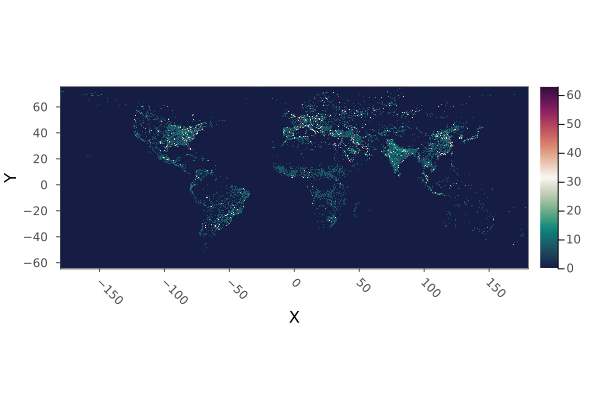

In [3]:
plot(raster)

## Indexing

In [4]:
raster[10, 10, 1] 

0x00

In [5]:
raster[1000, 1000, 1] |> Int

0

In [6]:
raster[X(Near(77.1025)), Y(Near(28.7041)), Band(1)] # value of image near longitude = 77.1025 and latitude = 28.7041

0x3f

In [7]:
raster[X(Near(77.1025)), Y(Near(28.7041)), Band(1)] |> Int 

63

## Shapefiles

In [8]:
shp = Shapefile.Table("DATA/world_shapefile_simplified/in_primary_countries.shp") |> DataFrame
# original source: https://github.com/wri/wri-bounds
# simplified using: https://mapshaper.org/

Row,geometry,ADM0_A3,abbrev,continent,formal_nam,iso_a2,iso_a3,iso_n3,iso_short,name,name_sort,postal,primary,short_name,sov_a3,sovereign,type,un_ar,un_en,un_es,un_fr,un_n3,un_region,un_ru,un_subregi,un_zh,wb_a2,wb_a3,wb_region
,Polygon,String,String,String,String?,String,String,Int64,String,String,String,String,Int64,String,String,String,String,String,String,String,String,Int64,String,String,String,String,String,String,String
1,Polygon(78 Points),AFG,Afg.,Asia,Islamic State of Afghanistan,AF,AFG,4,Afghanistan,Afghanistan,Afghanistan,AF,1,Afghanistan,AFG,Afghanistan,Sovereign country,ناتسناغفأ,Afghanistan,Afganistán (el),Afghanistan (l') [masc.],4,Asia,Афганистан,Southern Asia,阿富汗,AF,AFG,South Asia
2,Polygon(90 Points),AGO,Ang.,Africa,People's Republic of Angola,AO,AGO,24,Angola,Angola,Angola,AO,1,Angola,AGO,Angola,Sovereign country,الوغنأ,Angola,Angola,Angola (l') [masc.],24,Africa,Ангола,Middle Africa,安哥拉,AO,AGO,Sub-Saharan Africa
3,Polygon(19 Points),ALB,Alb.,Europe,Republic of Albania,AL,ALB,8,Albania,Albania,Albania,AL,1,Albania,ALB,Albania,Sovereign country,اينابلأ,Albania,Albania,Albanie (l') [fém.],8,Europe,Албания,Southern Europe,阿尔巴尼亚,AL,ALB,Europe & Central Asia
4,Polygon(4 Points),AND,And.,Europe,Principality of Andorra,AD,AND,20,Andorra,Andorra,Andorra,AND,1,Andorra,AND,Andorra,Sovereign country,ارودنأ,Andorra,Andorra,Andorre (l') [fém.],20,Europe,Андорра,Southern Europe,安道尔,AD,ADO,Europe & Central Asia
5,Polygon(26 Points),ARE,U.A.E.,Asia,United Arab Emirates,AE,ARE,784,United Arab Emirates (the),United Arab Emirates,United Arab Emirates,AE,1,United Arab Emirates,ARE,United Arab Emirates,Sovereign country,ةدحتملا ةيبرعلا تارامإلا,United Arab Emirates (the),Emiratos Árabes Unidos (los),Émirats arabes unis (les),784,Asia,Объединенные Арабские Эмираты,Western Asia,阿拉伯联合酋长国,AE,ARE,Middle East & North Africa
6,Polygon(197 Points),ARG,Arg.,South America,Argentine Republic,AR,ARG,32,Argentina,Argentina,Argentina,AR,1,Argentina,ARG,Argentina,Sovereign country,نيتنجرألا,Argentina,Argentina (la),Argentine,32,Americas,Аргентина,South America,阿根廷,AR,ARG,Latin America & Caribbean
7,Polygon(18 Points),ARM,Arm.,Asia,Republic of Armenia,AM,ARM,51,Armenia,Armenia,Armenia,ARM,1,Armenia,ARM,Armenia,Sovereign country,اينيمرأ,Armenia,Armenia,Arménie (l') [fém.],51,Asia,Армения,Western Asia,亚美尼亚,AM,ARM,Europe & Central Asia
8,Polygon(5 Points),ATG,Ant.B.,North America,Antigua and Barbuda,AG,ATG,28,Antigua and Barbuda,Antigua and Barbuda,Antigua and Barbuda,AG,1,Antigua and Barb.,ATG,Antigua and Barbuda,Sovereign country,ادوبربو اوغيتنأ,Antigua and Barbuda,Antigua y Barbuda,Antigua-et-Barbuda [fém.],28,Americas,Антигуа и Барбуда,Caribbean,安提瓜和巴布达,AG,ATG,Latin America & Caribbean
9,Polygon(302 Points),AUS,Auz.,Oceania,Commonwealth of Australia,AU,AUS,36,Australia,Australia,Australia,AU,1,Australia,AU1,Australia,Sovereign country,ايلارتسأ,Australia,Australia,Australie (l') [fém.],36,Oceania,Австралия,Australia and New Zealand,澳大利亚,AU,AUS,East Asia & Pacific


In [9]:
shp = dropmissing(shp); # some some island nation became missing when we simplified the shapes

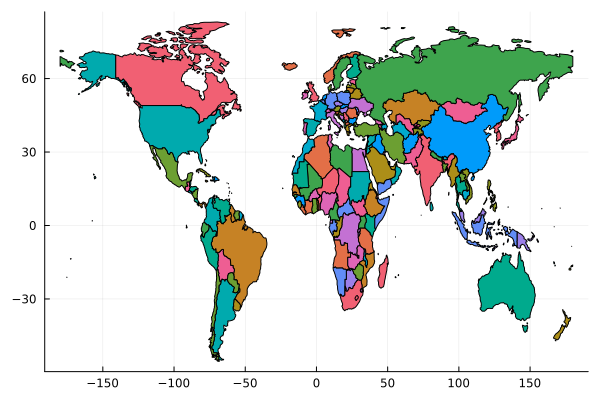

In [10]:
plot(shp.geometry)

In [11]:
japan_index = findall( x -> x == "Japan", shp.name)

1-element Vector{Int64}:
 87

## Cropping

In [12]:
japan2020 = crop(raster; to = shp.geometry[japan_index])

1879×1720×1 Raster{UInt8,3} with dimensions: 
  X Projected{Float64} range(129.637, stop=145.287, length=1879) ForwardOrdered Regular Intervals crs: WellKnownText,
  Y Projected{Float64} range(45.4458, stop=31.1208, length=1720) ReverseOrdered Regular Intervals crs: WellKnownText,
  Band Categorical{Int64} 1:1 ForwardOrdered
[:, :, 1]
            45.4458    45.4375    45.4292  …    31.1375    31.1292    31.1208
 129.637  0x00       0x00       0x00          0x00       0x00       0x00
 129.646  0x00       0x00       0x00          0x00       0x00       0x00
 129.654  0x00       0x00       0x00          0x00       0x00       0x00
 129.662  0x00       0x00       0x00          0x00       0x00       0x00
 129.671  0x00       0x00       0x00       …  0x00       0x00       0x00
   ⋮                                       ⋱                ⋮       
 145.246  0x00       0x00       0x00          0x00       0x00       0x00
 145.254  0x00       0x00       0x00          0x00       0x00       0x00
 145.

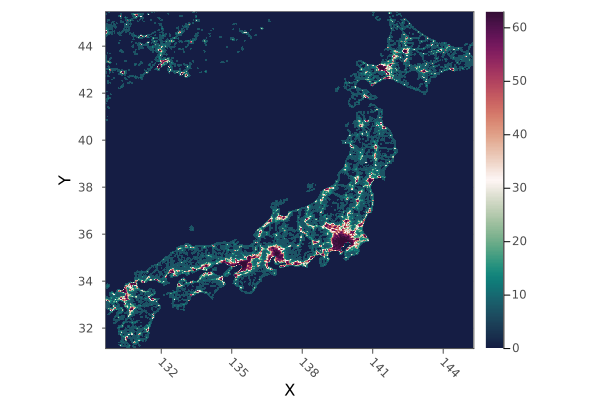

In [13]:
plot(japan2020)

## Masking

In [14]:
japan2020masked = @suppress mask(japan2020, with = shp.geometry[japan_index]) # @suppress is to suppress the warnings.  

1879×1720×1 Raster{Union{Missing, UInt8},3} with dimensions: 
  X Projected{Float64} range(129.637, stop=145.287, length=1879) ForwardOrdered Regular Intervals crs: WellKnownText,
  Y Projected{Float64} range(45.4458, stop=31.1208, length=1720) ReverseOrdered Regular Intervals crs: WellKnownText,
  Band Categorical{Int64} 1:1 ForwardOrdered
with missingval: missing
[:, :, 1]
          45.4458    45.4375    45.4292    …  31.1375    31.1292    31.1208
 129.637    missing    missing    missing       missing    missing    missing
 129.646    missing    missing    missing       missing    missing    missing
 129.654    missing    missing    missing       missing    missing    missing
 129.662    missing    missing    missing       missing    missing    missing
 129.671    missing    missing    missing  …    missing    missing    missing
   ⋮                                       ⋱              ⋮         
 145.246    missing    missing    missing       missing    missing    missing
 145.254 

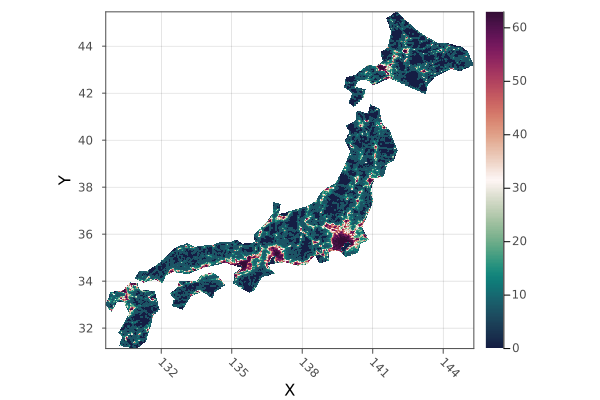

In [15]:
plot(japan2020masked)

In [16]:
sum(skipmissing(japan2020masked)) |> Int |> println
mean(skipmissing(japan2020masked)) |> Float32 |> println
median(skipmissing(japan2020masked)) |> Int |> println

5999718
11.252031
7


## Zonal statistics

In [17]:
sol_by_country = @suppress zonal(sum, raster; of=shp.geometry)

In [ ]:
shp_df = DataFrame(shp)
shp_df.sol = Int.(sol_by_country);

In [ ]:
sort(shp_df, :sol, rev=true)

The maximum limit of the Harmonized dataset is 63. While is dataset is good for demonstrations, it's inferior to the VIIRS dataset. Researchers using the topcoded dataset often use sum of lights per area as a proxy for GDP. 

## Datacubes

In [ ]:
path = "DATA/MODISAQ/"
filelist = readdir(path)
dates = collect(Date(2020,1):Month(1):Date(2021, 12))
bounds = X(Rasters.Between(65.39, 99.94)), Y(Rasters.Between(5.34, 39.27)) # bounding box around India

aod_raster_list = [Raster(i, lazy = true)[bounds...] for i in path .* filelist]
timestamps = collect(1:length(aod_raster_list))
aod_series = RasterSeries(aod_raster_list, Ti(timestamps))
aod_datacube = Rasters.combine(aod_series, Ti)[bounds...]

In [ ]:
view(aod_datacube, Band(1), Ti(1)) |> plot

In [ ]:
aod_datacube[X(Near(77.1025)), Y(Near(28.7041)), Band(1)] |> plot